In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import scikitplot as skplt
import os
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy Score
# Confusion Matrix
# Classification Report


#import methods
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
colnames=['PID', 'Text data', 'Label']
df1=pd.read_csv("/content/drive/MyDrive/train_data.csv",names=colnames,header=0)
df2=pd.read_csv("/content/drive/MyDrive/dev_data.csv",names=colnames,header=0)

In [ ]:
df=pd.DataFrame()
for i in range(len(df1)):
        df = df.append(df1.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [ ]:
for i in range(len(df2)):
        df = df.append(df2.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-7-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-7-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-7-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-7-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-7-bb8fb2c37300>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [ ]:
for i in range(len(df2)):
    if df2['Label'][i] == 'not depression':
        df = df.append(df2.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)

<ipython-input-8-a79f85118365>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-a79f85118365>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-a79f85118365>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-a79f85118365>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-a79f85118365>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2.loc[i])
<ipython-input-8-a79

In [ ]:
print(len(df))

10446


In [ ]:
countm=0
countn=0
counts=0
for i in range(len(df)):
  if df['Label'][i]=='not depression':
    countn+=1
  elif df['Label'][i]=='moderate':
    countm+=1
  elif df['Label'][i]=='severe':
    counts+=1
print("not depressed:",countn)
print("severe:",counts)
print("moderate:",countm)

not depressed: 4451
severe: 996
moderate: 5847


In [ ]:
df_encoded = df.copy()
df['Label'] = df['Label'].map({'not depression': 0, 'moderate': 1, 'severe': 2})


In [ ]:
df_Label=df['Label']
print(len(df_Label))

11294


In [ ]:
train_set, test_set= train_test_split(df, test_size = 0.20, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(9035, 3)
(2259, 3)

The Trainset consists of 9035 records and 3 features

The Testset consists of 2259 records and 3 features


In [ ]:
print(train_set['Label'],train_set['PID'])

8358     1
6333     0
11151    0
2458     2
1886     0
        ..
11284    0
5191     0
5390     0
860      1
7270     1
Name: Label, Length: 9035, dtype: int64 8358       dev_pid_1158
6333     train_pid_6334
11151      dev_pid_2875
2458     train_pid_2459
1886     train_pid_1887
              ...      
11284      dev_pid_3008
5191     train_pid_5192
5390     train_pid_5391
860       train_pid_861
7270         dev_pid_70
Name: PID, Length: 9035, dtype: object


In [ ]:
import joblib
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set['Text data'])
joblib.dump(countvect, "countvectorizer.pkl")
# preparing for training set
x_train_df = countvect.transform(train_set['Text data'])

# preparing for test set
x_test_df = countvect.transform(test_set['Text data'])




The accuracy of Naive Bayes clasifier is 65.82558654271801%

 [[ 379  519    2]
 [  55 1098    7]
 [   9  180   10]]


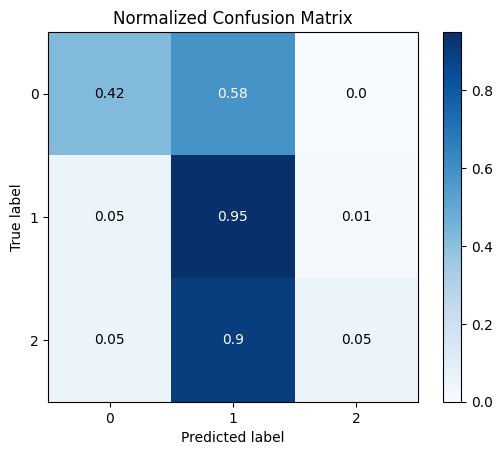

['model.pkl']

In [ ]:
import joblib
clf = MultinomialNB()
clf.fit(x_train_df,train_set['Label'])
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set['Label'], predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set['Label'], predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set['Label'], predicted_values_NB, normalize = True)
plt.show()
joblib.dump(clf, "model.pkl")

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_NB
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.42      0.56       900
     class 1       0.61      0.95      0.74      1160
     class 2       0.53      0.05      0.09       199

    accuracy                           0.66      2259
   macro avg       0.66      0.47      0.47      2259
weighted avg       0.70      0.66      0.61      2259



[0 0 0 ... 0 0 0]

The accuracy of K-Nearest Neighbors algorithm is 43.73616644532979%

 [[ 858   42    0]
 [1031  129    0]
 [ 165   33    1]]


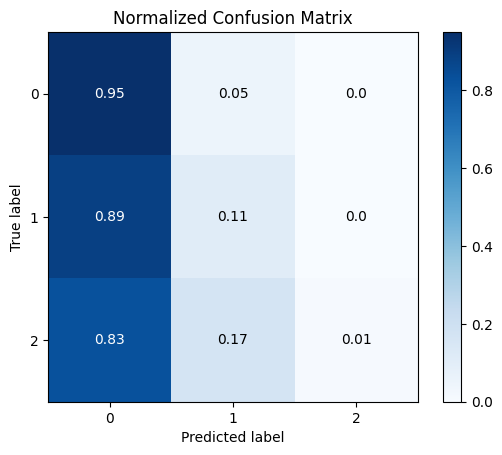

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_KNN
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.42      0.95      0.58       900
     class 1       0.63      0.11      0.19      1160
     class 2       1.00      0.01      0.01       199

    accuracy                           0.44      2259
   macro avg       0.68      0.36      0.26      2259
weighted avg       0.58      0.44      0.33      2259



[2 0 0 ... 1 0 0]

The accuracy of Decision Tree learning is 59.76095617529881%

 [[576 305  19]
 [350 733  77]
 [ 52 106  41]]


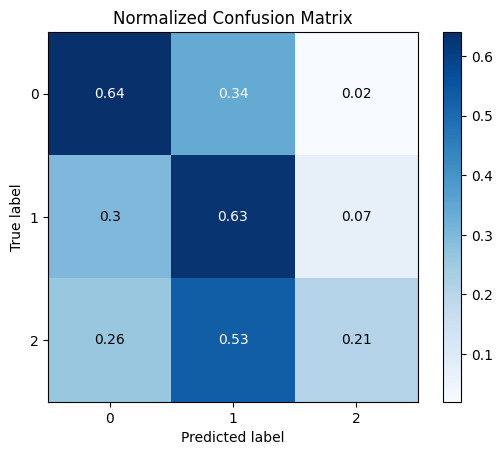

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_DT
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.64      0.61       900
     class 1       0.64      0.63      0.64      1160
     class 2       0.30      0.21      0.24       199

    accuracy                           0.60      2259
   macro avg       0.51      0.49      0.50      2259
weighted avg       0.59      0.60      0.59      2259



[1 1 0 ... 1 1 0]

The accuracy of Support Vector Machine (SVM) is 64.27622841965471%

 [[641 259   0]
 [345 810   5]
 [ 41 157   1]]


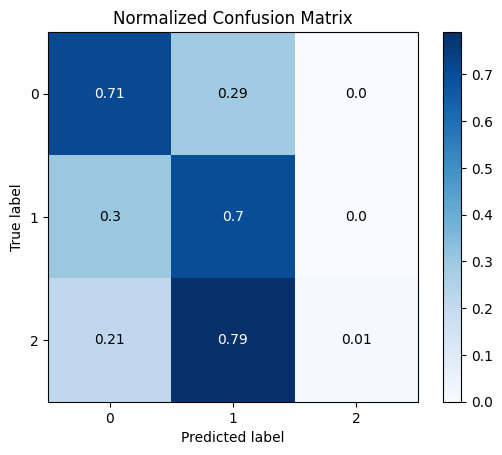

In [ ]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_SVM
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.71      0.67       900
     class 1       0.66      0.70      0.68      1160
     class 2       0.17      0.01      0.01       199

    accuracy                           0.64      2259
   macro avg       0.48      0.47      0.45      2259
weighted avg       0.60      0.64      0.61      2259



[1 1 0 ... 1 1 0]

The accuracy of Random Forest is 67.286409915892%

 [[582 318   0]
 [220 932   8]
 [ 24 169   6]]


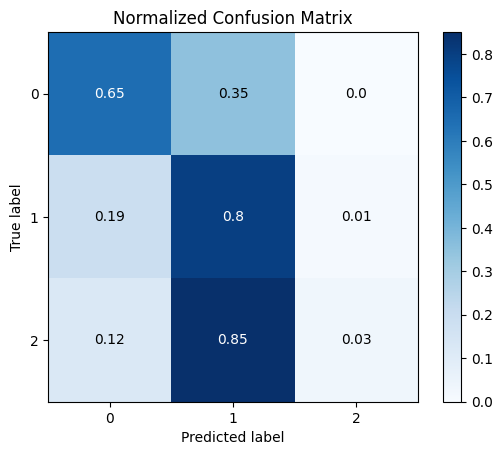

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_RF
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.65      0.67       900
     class 1       0.66      0.80      0.72      1160
     class 2       0.43      0.03      0.06       199

    accuracy                           0.67      2259
   macro avg       0.60      0.49      0.48      2259
weighted avg       0.66      0.67      0.64      2259



In [ ]:
from sklearn import svm
import joblib
d_f=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/NLP/test_data.xlsx")

countvect = joblib.load("countvectorizer.pkl")
# Create a placeholder column with default values
transform=countvect.transform(d_f['Text data'])

# Load the saved model
clf = joblib.load("model.pkl")

# Use the model to make predictions
predictions = clf.predict(transform)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
for i in range(len(d_f)):
  if predictions[i]==0:
    d_f['Label'][i]='not depression'
  elif predictions[i]==1:
    d_f['Label'][i]='moderate'
  elif predictions[i]==2:
    d_f['Label'][i]='severe'

In [ ]:
d_f.to_excel('output.xlsx', index=False)